<a href="https://colab.research.google.com/github/NishitSingh2023/LSTM-in-Trade/blob/master/Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd gdrive/My Drive/Project/LSTM-in-Trade

! git pull

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/Project/LSTM-in-Trade
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/NishitSingh2023/LSTM-in-Trade
   63a9394..f366a46  master     -> origin/master
Updating 63a9394..f366a46
Fast-forward
 Capstone_Project.ipynb | 1063 ++++++++++++++++

In [448]:
import numpy as np
import pandas as pd
import datetime as dt
import os
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from sklearn.model_selection import  train_test_split
import time
import matplotlib.pyplot as plt
from numpy import newaxis

In [591]:
c = pd.read_csv('DataSet/0stock_metadata.csv', usecols=['Company Name','Symbol'])
print(c)
choice=input("Enter the symbol for the stock to be predicted referring from the table below: ")

                                    Company Name      Symbol
0     Adani Ports and Special Economic Zone Ltd.  ADANIPORTS
1                              Asian Paints Ltd.  ASIANPAINT
2                                 Axis Bank Ltd.    AXISBANK
3                                Bajaj Auto Ltd.  BAJAJ-AUTO
4                             Bajaj Finance Ltd.  BAJFINANCE
5                             Bajaj Finserv Ltd.  BAJAJFINSV
6              Bharat Petroleum Corporation Ltd.        BPCL
7                             Bharti Airtel Ltd.  BHARTIARTL
8                           Bharti Infratel Ltd.    INFRATEL
9                      Britannia Industries Ltd.   BRITANNIA
10                                    Cipla Ltd.       CIPLA
11                               Coal India Ltd.   COALINDIA
12                 Dr. Reddy's Laboratories Ltd.     DRREDDY
13                            Eicher Motors Ltd.   EICHERMOT
14                             GAIL (India) Ltd.        GAIL
15                      

In [592]:
df = pd.read_csv('DataSet/'+choice+'.csv', usecols=['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume'])

In [593]:
df.count()

Date      4977
Symbol    4977
Open      4977
High      4977
Low       4977
Close     4977
Volume    4977
dtype: int64

In [594]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2000-01-03,BPCL,405.00,407.00,393.05,399.25,8720
1,2000-01-04,BPCL,397.75,397.75,367.40,370.50,22820
2,2000-01-05,BPCL,350.00,385.00,350.00,359.95,152538
3,2000-01-06,BPCL,362.00,384.00,362.00,380.30,59554
4,2000-01-07,BPCL,369.00,390.00,366.00,379.85,43187


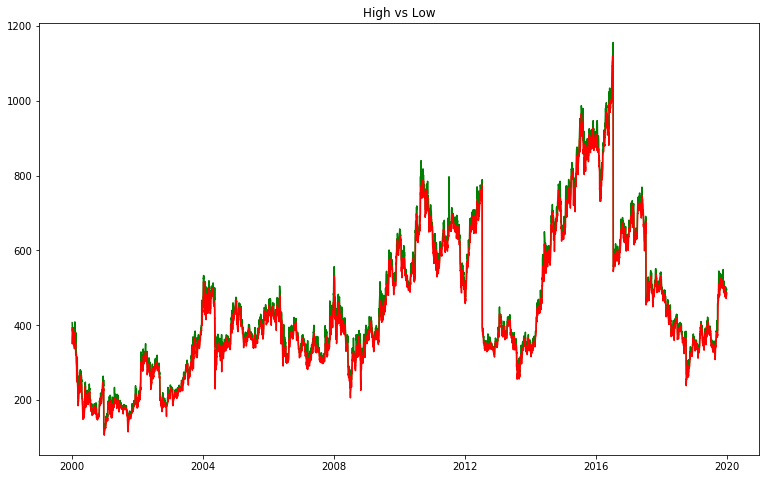

In [595]:
df['Date'] = pd.to_datetime(df['Date'])
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_axes([0, 0, 1, 1])
ax1.set_title('High vs Low')
ax1.plot(df['Date'],df['High'],color='green')
ax1.plot(df['Date'],df['Low'],color='red')
plt.show()

In [596]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date','Open','High','Low','Volume','Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    new_data['Open'][i] = data['Open'][i]
    new_data['High'][i] = data['High'][i]
    new_data['Low'][i] = data['Low'][i]
    new_data['Volume'][i] = data['Volume'][i]
print(new_data)

                     Date    Open    High     Low    Volume   Close
0     2000-01-03 00:00:00     405     407  393.05      8720  399.25
1     2000-01-04 00:00:00  397.75  397.75   367.4     22820   370.5
2     2000-01-05 00:00:00     350     385     350    152538  359.95
3     2000-01-06 00:00:00     362     384     362     59554   380.3
4     2000-01-07 00:00:00     369     390     366     43187  379.85
5     2000-01-10 00:00:00     380   394.5     380     52234  384.95
6     2000-01-11 00:00:00     385     385     366     17112   372.8
7     2000-01-12 00:00:00     380     382     375      5783     378
8     2000-01-13 00:00:00     380     380     373      2297     376
9     2000-01-14 00:00:00     378     382     373     18856   374.4
10    2000-01-17 00:00:00     379     379     372    133538  375.85
11    2000-01-18 00:00:00     375  391.95   373.1     39481  380.75
12    2000-01-19 00:00:00   381.3   389.8     375     41115  376.85
13    2000-01-20 00:00:00     376     378     36

In [597]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:4238,:]
print(train)
valid = dataset[4238:,:]
#train=train.reshape(-1,1)
#valid=valid.reshape(-1,1)
#print(train)

[[405.0 407.0 393.05 8720 399.25]
 [397.75 397.75 367.4 22820 370.5]
 [350.0 385.0 350.0 152538 359.95]
 ...
 [616.0 619.5 610.35 2335946 615.15]
 [615.5 645.0 614.05 4990830 639.65]
 [635.55 638.45 630.0 1558782 635.5]]


In [598]:
print(valid)

[[640.0 644.75 637.4 1126768 640.5]
 [644.0 658.0 636.6 3157385 650.55]
 [649.8 660.9 641.85 2785408 655.45]
 ...
 [479.5 492.1 477.0 8454378 490.95]
 [490.95 494.8 481.65 8186523 493.05]
 [492.0 496.0 486.35 5794952 491.55]]


In [599]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train)
np.append(scaled_data,scaler.fit_transform(valid),axis=0)
#scaled_data=scaled_data.reshape(-1,5)
print(scaled_data)

[[2.85868605e-01 2.78767453e-01 2.82882083e-01 2.50793917e-04
  2.82558765e-01]
 [2.78748895e-01 2.69860376e-01 2.57582483e-01 8.01345720e-04
  2.54459268e-01]
 [2.31857017e-01 2.57583052e-01 2.40420181e-01 5.86634422e-03
  2.44147974e-01]
 ...
 [4.93076696e-01 4.83389504e-01 4.97213592e-01 9.11201890e-02
  4.93573767e-01]
 [4.92585682e-01 5.07944150e-01 5.00863047e-01 1.94783393e-01
  5.17519425e-01]
 [5.12275361e-01 5.01636976e-01 5.16595157e-01 6.07748669e-02
  5.13463324e-01]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [600]:
x_train, y_train = [], []
for i in range(60,len(train)//4):
    x_train.append(scaled_data[i-60:i,0:4])
    y_train.append(scaled_data[i:i+1,4:5])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1]*4,1))
print(x_train)
y_train = np.squeeze(y_train)
print(y_train)

[[[0.2858686 ]
  [0.27876745]
  [0.28288208]
  ...
  [0.14053924]
  [0.14721113]
  [0.00115163]]

 [[0.2787489 ]
  [0.26986038]
  [0.25758248]
  ...
  [0.13336543]
  [0.1372491 ]
  [0.00237456]]

 [[0.23185702]
  [0.25758305]
  [0.24042018]
  ...
  [0.14492056]
  [0.13680525]
  [0.00060084]]

 ...

 [[0.31356182]
  [0.30832932]
  [0.30847759]
  ...
  [0.33307655]
  [0.33214973]
  [0.03363739]]

 [[0.31773544]
  [0.30808859]
  [0.29170982]
  ...
  [0.32142513]
  [0.32958524]
  [0.03401957]]

 [[0.30649121]
  [0.30649976]
  [0.31104207]
  ...
  [0.31709196]
  [0.32430833]
  [0.01766053]]]
[0.13854274 0.14694815 0.16732639 0.15481601 0.1457753  0.14132825
 0.15882324 0.15486488 0.1546694  0.14802326 0.14689928 0.13409568
 0.12671651 0.10995455 0.09695548 0.09265504 0.08429849 0.08512926
 0.07867859 0.06377364 0.04344427 0.0515076  0.05732297 0.05013928
 0.04500806 0.04769584 0.05057909 0.04842887 0.04632752 0.0427601
 0.04891756 0.05981528 0.07994918 0.07032204 0.0741338  0.07721253
 0.09

In [601]:
print(len(y_train))

999


In [602]:
model = Sequential()
model.add(LSTM(240, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(180, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(200, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(output_dim = 1 ,init ='uniform'))
model.add(Activation('relu'))

start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print ('compilation time : ', time.time() - start)

compilation time :  0.044004201889038086


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, kernel_initializer="uniform")`
  


In [608]:
model.fit(x_train, y_train, batch_size=60, epochs=10)

Epoch 1/10
999/999 [==============================] - 39s 39ms/step - loss: 0.0093
Epoch 2/10
999/999 [==============================] - 35s 35ms/step - loss: 0.0021
Epoch 3/10
999/999 [==============================] - 34s 34ms/step - loss: 6.4660e-04
Epoch 4/10
999/999 [==============================] - 34s 34ms/step - loss: 5.2007e-04
Epoch 5/10
999/999 [==============================] - 34s 34ms/step - loss: 4.5445e-04
Epoch 6/10
999/999 [==============================] - 35s 35ms/step - loss: 4.8909e-04
Epoch 7/10
999/999 [==============================] - 35s 35ms/step - loss: 4.5608e-04
Epoch 8/10
999/999 [==============================] - 34s 34ms/step - loss: 4.9404e-04
Epoch 9/10
999/999 [==============================] - 36s 36ms/step - loss: 4.3989e-04
Epoch 10/10
999/999 [==============================] - 35s 35ms/step - loss: 4.9891e-04


In [609]:
inputs = valid
inputs  = scaler.transform(inputs)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0:4])
X_test = np.array(X_test)
print(len(X_test))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1]*4,1))
print(len(X_test))

679
679


In [610]:
closing_price = model.predict(X_test)
print(len(closing_price))
#closing_price.reshape(-1,4)
b = np.zeros((679,5))
b[:,0:1] = closing_price
print(b)
closing_price = scaler.inverse_transform(b)
#closing_price=closing_price.reshape(-1,4)
#print(closing_price)
closing_price = closing_price[:,0:1]
print(closing_price)

679
[[0.7613039  0.         0.         0.         0.        ]
 [0.75863189 0.         0.         0.         0.        ]
 [0.75738901 0.         0.         0.         0.        ]
 ...
 [0.46716759 0.         0.         0.         0.        ]
 [0.46831545 0.         0.         0.         0.        ]
 [0.47108588 0.         0.         0.         0.        ]]
[[635.82156172]
 [634.49864629]
 [633.88329836]
 [634.3706898 ]
 [634.18867052]
 [633.20273275]
 [632.80759037]
 [637.53236   ]
 [649.31090797]
 [664.10029919]
 [677.33668349]
 [688.19132425]
 [695.95506042]
 [700.47898322]
 [702.29814317]
 [702.50722336]
 [701.39858193]
 [699.78053439]
 [700.27819541]
 [702.51802412]
 [704.743983  ]
 [706.02062634]
 [707.38464956]
 [709.44638385]
 [710.77225031]
 [710.69401861]
 [708.52893939]
 [705.38577213]
 [703.47020215]
 [703.29662281]
 [704.02841823]
 [704.60549135]
 [704.77116195]
 [704.37539986]
 [702.63093037]
 [698.80504325]
 [693.11301584]
 [688.0257717 ]
 [686.18855146]
 [688.93102842]
 [

In [611]:
print(valid[:,4:5])
rms=np.sqrt(np.mean(np.power((valid[:679,4:5]-closing_price),2)))
print(rms)

[[640.5]
 [650.55]
 [655.45]
 [672.7]
 [664.85]
 [653.1]
 [660.3]
 [660.9]
 [659.3]
 [657.65]
 [668.1]
 [664.95]
 [655.45]
 [673.9]
 [664.75]
 [677.05]
 [682.4]
 [711.2]
 [704.75]
 [704.65]
 [681.65]
 [692.75]
 [701.9]
 [698.6]
 [705.35]
 [716.65]
 [720.5]
 [726.85]
 [715.55]
 [714.55]
 [692.05]
 [674.7]
 [669.4]
 [679.0]
 [700.25]
 [703.95]
 [714.3]
 [717.65]
 [707.7]
 [670.05]
 [659.45]
 [635.15]
 [632.8]
 [637.55]
 [645.9]
 [639.0]
 [632.0]
 [623.35]
 [636.7]
 [636.5]
 [647.75]
 [642.1]
 [643.6]
 [641.9]
 [645.0]
 [655.05]
 [649.7]
 [643.15]
 [645.95]
 [643.1]
 [640.65]
 [649.85]
 [638.4]
 [637.75]
 [646.2]
 [675.35]
 [700.3]
 [710.4]
 [717.3]
 [731.1]
 [723.75]
 [724.2]
 [722.9]
 [721.3]
 [715.8]
 [714.85]
 [739.35]
 [731.75]
 [736.0]
 [719.25]
 [739.85]
 [736.2]
 [731.5]
 [724.75]
 [715.6]
 [721.4]
 [728.25]
 [730.65]
 [733.15]
 [727.85]
 [733.3]
 [727.45]
 [714.9]
 [702.45]
 [695.6]
 [699.55]
 [711.9]
 [726.85]
 [749.65]
 [754.85]
 [738.75]
 [742.65]
 [739.0]
 [724.8]
 [728.55]
 

679


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


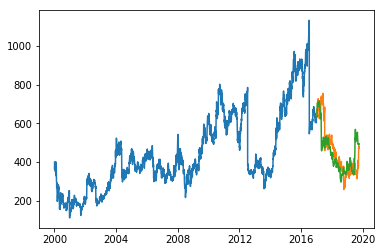

In [612]:
%matplotlib inline

train = new_data[:4238]
valid1 = new_data[4238:-739+679]

print(len(valid1))
valid1['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid1[['Close','Predictions']])

In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y, p(x))

In [ ]:
pred_fig = plt.figure(figsize=(10,6))
ax2 = pred_fig.add_axes([0, 0, 1, 1])
ax2.set_title('Actual vs Predicted close')
ax2.plot(train['Close'], color='blue')
ax2.plot(valid[['Close','Predictions']])

plt.show()